In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [3]:
df = pd.read_csv(r'C:\Users\singh\Downloads\movies.csv')

In [ ]:
# looking at the data

In [4]:
df.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [5]:
# Using a for loop to check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

budget - 0.0%
company - 0.0%
country - 0.0%
director - 0.0%
genre - 0.0%
gross - 0.0%
name - 0.0%
rating - 0.0%
released - 0.0%
runtime - 0.0%
score - 0.0%
star - 0.0%
votes - 0.0%
writer - 0.0%
year - 0.0%


In [6]:
# Looking at Data types for columns

df.dtypes

budget      float64
company      object
country      object
director     object
genre        object
gross       float64
name         object
rating       object
released     object
runtime       int64
score       float64
star         object
votes         int64
writer       object
year          int64
dtype: object

In [ ]:
# Changing the data types of columns for more readability

In [8]:
df['budget'] = df['budget'].astype('int64')

df['gross'] = df['gross'].astype('int64')

In [9]:
df

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,Fox Searchlight Pictures,UK,Mandie Fletcher,Comedy,4750497,Absolutely Fabulous: The Movie,R,2016-07-22,91,5.4,Jennifer Saunders,9161,Jennifer Saunders,2016
6816,0,Siempre Viva Productions,USA,Paul Duddridge,Drama,28368,Mothers and Daughters,PG-13,2016-05-06,90,4.9,Selma Blair,1959,Paige Cameron,2016
6817,3500000,Warner Bros. Animation,USA,Sam Liu,Animation,3775000,Batman: The Killing Joke,R,2016-07-25,76,6.5,Kevin Conroy,36333,Brian Azzarello,2016
6818,0,Borderline Presents,USA,Nicolas Pesce,Drama,25981,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika Magalh�es,6947,Nicolas Pesce,2016


In [10]:
# Modifying year column so that mismatching years in both 'years' and 'released' columns have correct years

df['corrected_year'] = df['released'].astype(str)[:4]

In [11]:
# Sorting data by highest grossing films in descending order

df.sort_values(by=['gross'], inplace=False, ascending=False)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,corrected_year
6380,245000000,Lucasfilm,USA,J.J. Abrams,Action,936662225,Star Wars: The Force Awakens,PG-13,2015-12-18,136,8.1,Daisy Ridley,687192,Lawrence Kasdan,2015,NaN
5061,237000000,Twentieth Century Fox Film Corporation,UK,James Cameron,Action,760507625,Avatar,PG-13,2009-12-18,162,7.8,Sam Worthington,954412,James Cameron,2009,NaN
2420,200000000,Twentieth Century Fox Film Corporation,USA,James Cameron,Drama,658672302,Titanic,PG-13,1997-12-19,194,7.8,Leonardo DiCaprio,862554,James Cameron,1997,NaN
6391,150000000,Universal Pictures,USA,Colin Trevorrow,Action,652270625,Jurassic World,PG-13,2015-06-12,124,7.0,Chris Pratt,469200,Rick Jaffa,2015,NaN
5723,220000000,Marvel Studios,USA,Joss Whedon,Action,623357910,The Avengers,PG-13,2012-05-04,143,8.1,Robert Downey Jr.,1064633,Joss Whedon,2012,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5917,0,Zentropa International Norway,Norway,Petter N�ss,Action,547,Into the White,R,2013-04-12,104,7.2,Florian Lukas,16609,Ole Meldgaard,2012,NaN
5699,0,Isle of Man Film,UK,Sheree Folkson,Comedy,542,The Decoy Bride,PG,2012-03-09,89,6.2,Kelly Macdonald,9018,Neil Jaworski,2011,NaN
6066,0,Cinetel Films,USA,Steven R. Monroe,Crime,441,I Spit on Your Grave 2,R,2014-01-19,106,5.7,Jemma Dallender,21070,Neil Elman,2013,NaN
2594,15000000,Daybreak,USA,George Huang,Comedy,309,Trojan War,PG-13,1997-10-01,84,5.7,Will Friedle,5034,Andy Burg,1997,NaN


In [12]:
# Searching for and dropping any duplicate values in the dataset

df['company'].drop_duplicates().sort_values(ascending=False)

5288                        micro_scope
3486                           i5 Films
6084                               erbp
3225                     double A Films
2707        Zucker Brothers Productions
                     ...               
3527                          120 Films
5466              10th Hole Productions
2815                 101st Street Films
3208                 1+2 Seisaku Iinkai
3832    "DIA" Productions GmbH & Co. KG
Name: company, Length: 2179, dtype: object

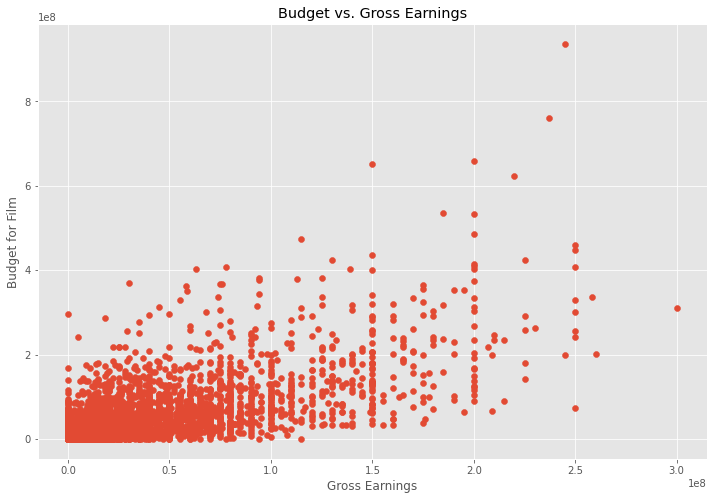

In [17]:
# Scatter plot comparing budget vs gross earnings

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

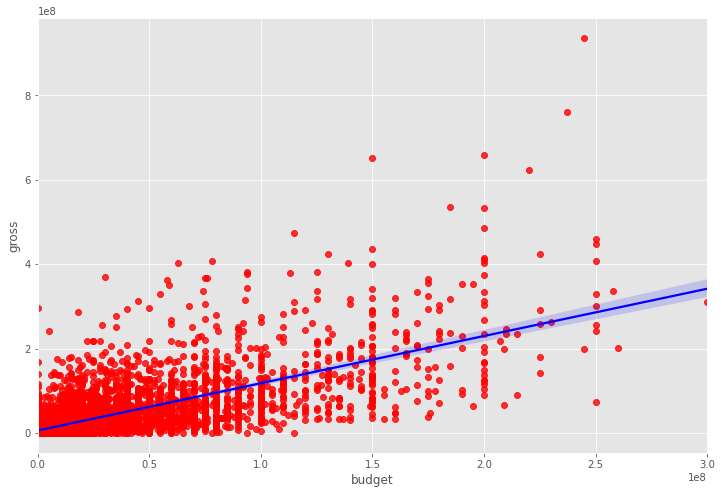

In [20]:
# Using Seaborn to show t budget vs. gross earnings with regression plot

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color" : "red"}, line_kws={"color" : "blue"})

In [21]:
# Finding other correlations in the data

df.corr()

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712196,0.268226,0.042145,0.503924,0.291009
gross,0.712196,1.000000,0.224579,0.165693,0.662457,0.191548
runtime,0.268226,0.224579,1.000000,0.395343,0.317399,0.087639
score,0.042145,0.165693,0.395343,1.000000,0.393607,0.105276
votes,0.503924,0.662457,0.317399,0.393607,1.000000,0.229304
year,0.291009,0.191548,0.087639,0.105276,0.229304,1.000000


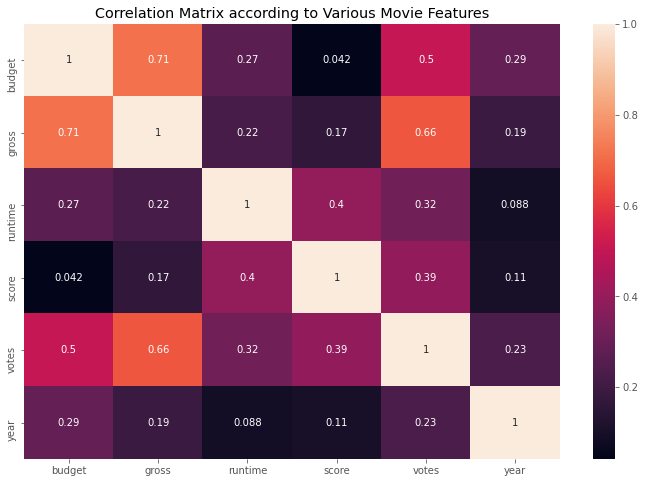

In [25]:
#Plotting Correlation Matrix with Seaborn HeatMap 

correlation_matrix = df.corr(method='pearson')
plt.title('Correlation Matrix according to Various Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [27]:
# Numerizing categorical data with object data types to allow for correlation analysis

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,corrected_year
0,8000000,Columbia Pictures Corporation,54,2192,1,52287414,4661,8,39,89,8.1,2454,299174,3716,1986,3
1,6000000,Paramount Pictures,54,1296,4,70136369,1821,7,27,103,7.8,1605,264740,1970,1986,1
2,15000000,Paramount Pictures,54,2645,0,179800601,6203,6,23,110,6.9,2345,236909,1852,1986,0
3,18500000,Twentieth Century Fox Film Corporation,54,1066,0,85160248,295,8,33,137,8.4,2192,540152,1629,1986,2
4,9000000,Walt Disney Pictures,54,2123,1,18564613,1872,6,36,90,6.9,1139,36636,2549,1986,-1


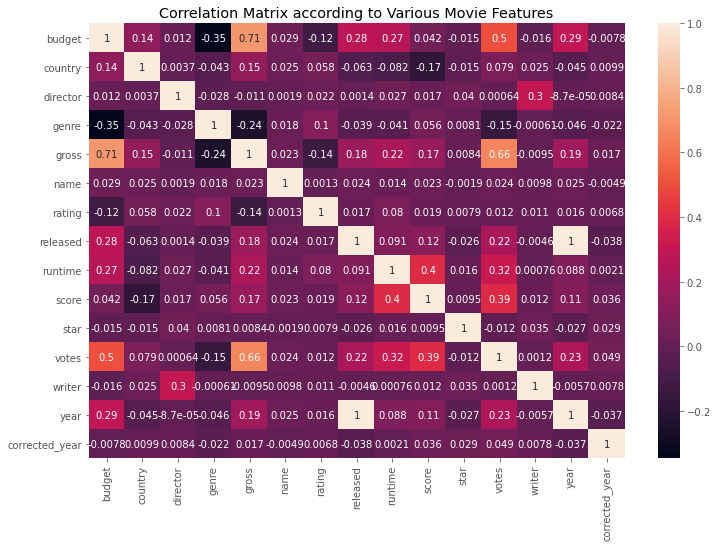

In [28]:
# Plotting correlation matrix with newly numerized data 

correlation_matrix = df_numerized.corr(method='pearson')
plt.title('Correlation Matrix according to Various Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [29]:
# Comparing correlation values by pairing categories side by side

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

budget          budget            1.000000
                country           0.137635
                director          0.011602
                genre            -0.346794
                gross             0.712196
                                    ...   
corrected_year  star              0.028756
                votes             0.048652
                writer            0.007816
                year             -0.037088
                corrected_year    1.000000
Length: 225, dtype: float64

In [30]:
# Comparing correlation values by sorting values

sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre           budget           -0.346794
budget          genre            -0.346794
genre           gross            -0.242676
gross           genre            -0.242676
score           country          -0.174414
                                    ...   
genre           genre             1.000000
director        director          1.000000
country         country           1.000000
year            year              1.000000
corrected_year  corrected_year    1.000000
Length: 225, dtype: float64

In [31]:
# Displaying values with high positive correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

budget          votes             0.503924
votes           budget            0.503924
gross           votes             0.662457
votes           gross             0.662457
budget          gross             0.712196
gross           budget            0.712196
released        year              0.996187
year            released          0.996187
budget          budget            1.000000
released        released          1.000000
writer          writer            1.000000
votes           votes             1.000000
star            star              1.000000
score           score             1.000000
runtime         runtime           1.000000
rating          rating            1.000000
name            name              1.000000
gross           gross             1.000000
genre           genre             1.000000
director        director          1.000000
country         country           1.000000
year            year              1.000000
corrected_year  corrected_year    1.000000
dtype: floa